## [Selenium Python Bindings](https://selenium-python.readthedocs.io/)

WebDriver enables you to use a programming language in creating browser test scripts.

In [1]:
from selenium import webdriver

In [3]:
dir(webdriver)

['ActionChains',
 'Android',
 'BlackBerry',
 'Chrome',
 'ChromeOptions',
 'DesiredCapabilities',
 'Edge',
 'Firefox',
 'FirefoxOptions',
 'FirefoxProfile',
 'Ie',
 'IeOptions',
 'Opera',
 'PhantomJS',
 'Proxy',
 'Remote',
 'Safari',
 'TouchActions',
 'WebKitGTK',
 'WebKitGTKOptions',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'android',
 'blackberry',
 'chrome',
 'common',
 'edge',
 'firefox',
 'ie',
 'opera',
 'phantomjs',
 'remote',
 'safari',
 'support',
 'webkitgtk']

## [Installing chromedriver](http://chromedriver.chromium.org/downloads)

We'll need to install cromedriver and add it to PATH.

## [A quick example](https://www.techbeamers.com/locate-elements-selenium-python/)

In [5]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

driver = webdriver.Chrome()
driver.get("http://www.python.org")
assert "Python" in driver.title

elem = driver.find_element_by_name("q")
elem.clear()
elem.send_keys("pycon")
elem.send_keys(Keys.RETURN)


In [7]:
some_options = [
    driver.find_element_by_name,
    driver.find_element_by_id,
    driver.find_element_by_partial_link_text
]

some_options

[<bound method WebDriver.find_element_by_name of <selenium.webdriver.chrome.webdriver.WebDriver (session="d8d61bfd136ff72b8a23e93aae0c1b88")>>,
 <bound method WebDriver.find_element_by_id of <selenium.webdriver.chrome.webdriver.WebDriver (session="d8d61bfd136ff72b8a23e93aae0c1b88")>>,
 <bound method WebDriver.find_element_by_partial_link_text of <selenium.webdriver.chrome.webdriver.WebDriver (session="d8d61bfd136ff72b8a23e93aae0c1b88")>>]

## [typeracer](https://play.typeracer.com/)
Increase your typing speed while racing against others.

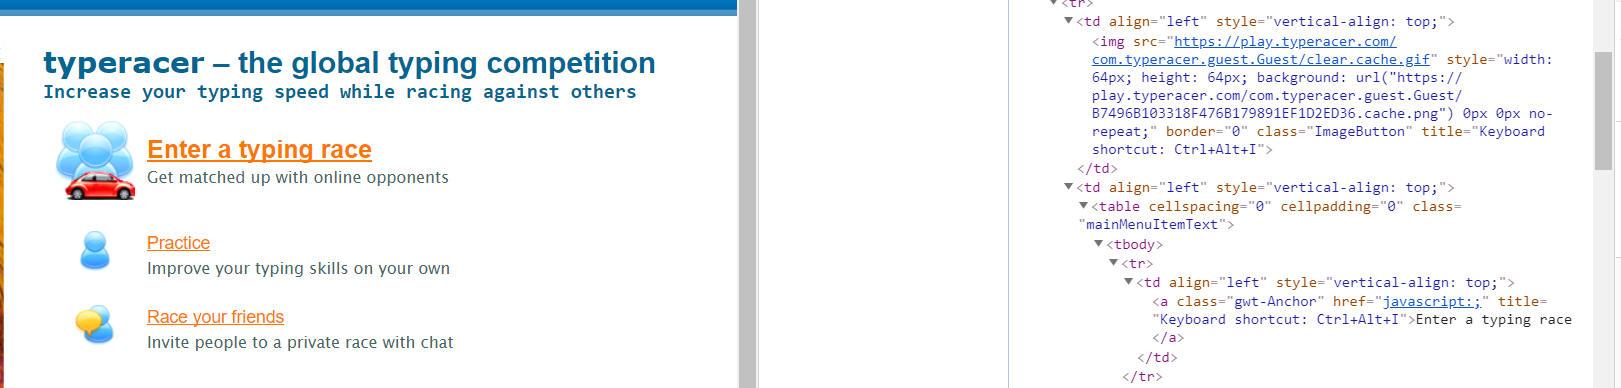

In [17]:
import os
from IPython.display import Image

Image(os.path.join("images", "gwt-Anchor.png"))

In the image we can see that the 'Enter a typing race' link has the class 'gwt-Anchor'.

As we all know, CSS stands for Cascading Style Sheets. By using [CSS selectors](https://www.360logica.com/blog/using-css-selectors-selenium/), we can find or select HTML elements on the basis of their id, class or other attributes. We can click on this link using selenium...

In [24]:
from selenium.webdriver.common.by import By

dir(By)[:8]

['CLASS_NAME',
 'CSS_SELECTOR',
 'ID',
 'LINK_TEXT',
 'NAME',
 'PARTIAL_LINK_TEXT',
 'TAG_NAME',
 'XPATH']

In [51]:
import selenium

dir(selenium.common.exceptions)[:10]

['ElementClickInterceptedException',
 'ElementNotInteractableException',
 'ElementNotSelectableException',
 'ElementNotVisibleException',
 'ErrorInResponseException',
 'ImeActivationFailedException',
 'ImeNotAvailableException',
 'InsecureCertificateException',
 'InvalidArgumentException',
 'InvalidCookieDomainException']

Create an account with typeracer and set your username / password...

In [1]:
# enter your login details here...
USER = "XXX"
PASS = "YYY"

In [5]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import *

# navigate to the url
url = "https://play.typeracer.com/"

driver = webdriver.Chrome()
driver.get(url)

# wait for the page to load
element = WebDriverWait(driver, 10).until(
    EC.visibility_of_element_located((
        By.CSS_SELECTOR,
        ".gwt-Anchor"
    ))
)

# click on 'Enter a typing race'
driver.find_element_by_css_selector('.gwt-Anchor').click()

# you'll get prompted for a username and password
driver.find_element_by_css_selector('input.gwt-TextBox').send_keys(USER)
driver.find_element_by_css_selector('input.gwt-PasswordTextBox').send_keys(PASS)
driver.find_element_by_css_selector('button.gwt-Button').click()

# you're now logged in, so attempt to enter a race again
element = WebDriverWait(driver, 10).until(
    EC.visibility_of_element_located((
        By.CSS_SELECTOR,
        ".gwt-Anchor"
    ))
)


def try_enter_race():
    """ Make a few attempts to enter a race. """
    success = False
    counter = 0
    while not success and counter < 10:
        try:
            driver.find_element_by_css_selector('.mainMenu  a.gwt-Anchor').click()
        except (NoSuchElementException, ElementClickInterceptedException):
            success = False
        else:
            success = True
        counter += 1
        time.sleep(1)
    return success


try_enter_race()


# now that we are in a race we need the text to type
html = driver.page_source


In [ ]:
! pip install beautifulsoup4

In [13]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html, "html.parser")
span_list = soup.find_all("span")
span_list

[<span></span>,
 <span class="lblUsername">(you)</span>,
 <span class="lblUsername" style="visibility: hidden;"></span>,
 <span class="PeETNNFh TeCzWcQm" unselectable="on">T</span>,
 <span class="PeETNNFh" unselectable="on">he</span>,
 <span unselectable="on"> dispositions of agents, their habitus, that is, the mental structures through which they apprehend the social world, are essentially the product of the internalization of the structures of that world.</span>,
 <span class="gwt-InlineHTML"> </span>,
 <span class="ElapsedTimeLabel">21 minutes ago</span>,
 <span class="ElapsedTimeLabel">5 minutes ago</span>,
 <span class="ElapsedTimeLabel">50 minutes ago</span>,
 <span class="ElapsedTimeLabel">57 minutes ago</span>,
 <span class="ElapsedTimeLabel">19 minutes ago</span>,
 <span class="ElapsedTimeLabel">6 minutes ago</span>,
 <span class="ElapsedTimeLabel">7 minutes ago</span>,
 <span class="ElapsedTimeLabel">44 minutes ago</span>,
 <span class="ElapsedTimeLabel">24 minutes ago</span>

In [19]:
for span in span_list:
    attrs = span.attrs
    span_text = span.text
    print(attrs)
    print(span_text)
    print("*" * 10)


{}

**********
{'class': ['lblUsername']}
(you)
**********
{'class': ['lblUsername'], 'style': 'visibility: hidden;'}

**********
{'unselectable': 'on', 'class': ['PeETNNFh', 'TeCzWcQm']}
T
**********
{'unselectable': 'on', 'class': ['PeETNNFh']}
he
**********
{'unselectable': 'on'}
 dispositions of agents, their habitus, that is, the mental structures through which they apprehend the social world, are essentially the product of the internalization of the structures of that world.
**********
{'class': ['gwt-InlineHTML']}
 
**********
{'class': ['ElapsedTimeLabel']}
21 minutes ago
**********
{'class': ['ElapsedTimeLabel']}
5 minutes ago
**********
{'class': ['ElapsedTimeLabel']}
50 minutes ago
**********
{'class': ['ElapsedTimeLabel']}
57 minutes ago
**********
{'class': ['ElapsedTimeLabel']}
19 minutes ago
**********
{'class': ['ElapsedTimeLabel']}
6 minutes ago
**********
{'class': ['ElapsedTimeLabel']}
7 minutes ago
**********
{'class': ['ElapsedTimeLabel']}
44 minutes ago
**********

In [21]:
typing_content = []

for span in span_list:
    attrs = span.attrs
    if "unselectable" in attrs:
        span_text = span.text
        typing_content.append(span_text)

typing_content

['T',
 'he',
 ' dispositions of agents, their habitus, that is, the mental structures through which they apprehend the social world, are essentially the product of the internalization of the structures of that world.']

In [22]:
"".join(typing_content)

'The dispositions of agents, their habitus, that is, the mental structures through which they apprehend the social world, are essentially the product of the internalization of the structures of that world.'

So we have the text we need to send to the browser... look for the text input box and send keys to the browser.

## Running the bot

In [3]:
from pytyperacer import TypingBot

USERNAME = "XXX"
PASSWORD = "YYY"

bot = TypingBot(USERNAME, PASSWORD)
bot.race()

[<selenium.webdriver.remote.webelement.WebElement (session="21d21753d05e384ce07334242b08a3dd", element="01bfe419-0aeb-49f9-86dd-5f24031c358c")>, <selenium.webdriver.remote.webelement.WebElement (session="21d21753d05e384ce07334242b08a3dd", element="2d5d76ab-3182-469f-8308-ae6e67d538ee")>, <selenium.webdriver.remote.webelement.WebElement (session="21d21753d05e384ce07334242b08a3dd", element="d74a11bd-7c46-4964-93e4-eec9e735d26f")>, <selenium.webdriver.remote.webelement.WebElement (session="21d21753d05e384ce07334242b08a3dd", element="76dba4a5-9f2c-4cbb-95d6-c01e23affa48")>, <selenium.webdriver.remote.webelement.WebElement (session="21d21753d05e384ce07334242b08a3dd", element="31717245-6199-48bc-8299-061887e1a01a")>, <selenium.webdriver.remote.webelement.WebElement (session="21d21753d05e384ce07334242b08a3dd", element="1a91e369-d354-47f3-889c-4707532523e6")>, <selenium.webdriver.remote.webelement.WebElement (session="21d21753d05e384ce07334242b08a3dd", element="d2f387f6-35bf-4452-bdf0-646c6167

In [1]:
USERNAME = "typeracer196"
PASSWORD = "typeracermail"

In [21]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import *

# navigate to the url
url = "https://play.typeracer.com/"

driver = webdriver.Chrome()
driver.get(url)


In [22]:
html = driver.page_source

In [23]:
# wait for the page to load
element = WebDriverWait(driver, 2).until(
    EC.visibility_of_element_located((
        By.CSS_SELECTOR,
        "will throw except"
    ))
)

TimeoutException: Message: 


In [4]:
'<a class="gwt-Anchor" href="javascript:;">Sign In</a>' in html

True

In [5]:
element = WebDriverWait(driver, 10).until(
    EC.visibility_of_element_located((
        By.LINK_TEXT,
        "Sign In"
    ))
)

In [8]:
condition = EC.visibility_of_element_located((
    By.LINK_TEXT,
    "Sign In"
))

condition

In [9]:
bool(condition)

True

In [10]:
condition = EC.visibility_of_element_located((
    By.LINK_TEXT,
    "Enter a typing race"
))

bool(condition)  # Race Again »

True

In [15]:
condition = EC.visibility_of_element_located((
    By.LINK_TEXT,
    "fuck that where is the link"
))

bool(condition)

True

In [19]:
element = driver.find_element_by_link_text("Race Again »")
element

<selenium.webdriver.remote.webelement.WebElement (session="eb06f892a7c5c7bf123ce2b70720c045", element="afdfc89d-da42-48be-86ab-337d378b6078")>

In [20]:
element = driver.find_element_by_link_text("this is not an element")
element

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"link text","selector":"this is not an element"}
  (Session info: chrome=76.0.3809.100)


In [ ]:
<a class="gwt-Anchor" href="javascript:;" title="Keyboard shortcut: Ctrl+Alt+J (except while racing)">« main menu (leave race)</a>

***